In [4]:
##importing necessary packages
#model tracking
import dagshub
import mlflow

#data mmanipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

#supress warnings
import warnings
warnings.filterwarnings('ignore')


In [21]:
import os

os.environ['MODEL_TRACKING_URI']= f"https://dagshub.com/iamchetan-ds/personal-loan-modeling.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'iamchetan-ds'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'b92c73171551125b265def04bf0897d3797472c9'

In [22]:
##setting up remote tracking server
MLFLOW_TRACKING_URI='https://dagshub.com/iamchetan-ds/personal-loan-modeling.mlflow'
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [23]:
def get_experiment_id(name):
    exp = mlflow.get_experiment_by_name(name)
    if exp is None:
        exp_id = mlflow.create_experiment(name)
        return exp_id
    return exp.experiment_id

In [24]:
print(get_experiment_id('loan-modeling'))

0


In [5]:
#reading data
df = pd.read_csv('../data/loan-modeling-data.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
#shuffling the dataset
df = df.sample(frac=1).reset_index()

In [9]:
df.shape

(5000, 15)

In [13]:
#seting 4000 samples for training and remaining for testing
train = df.head(4000)
test = df.tail(1000)

train.to_csv('../data/train-data.csv', sep =',', header=True, index=False)
test.to_csv('../data/test-data.csv', sep=',', header=True, index=False)

In [27]:
train.head()

index    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0   3749  3750   43          19      70     90095       3   2.33          1   
1   3773  3774   62          36      83     93940       4   2.40          3   
2   1071  1072   39          14      61     94005       3   0.50          3   
3   4014  4015   56          32      23     94720       4   0.70          1   
4   4590  4591   58          34     151     94022       3   0.60          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   0           0       1           0  
1         0              0                   1           0       0           0  
2       137              0                   0           0       1           0  
3         0              0                   0           0       1           1  
4         0              1                   0           0       0           0

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4000 non-null   int64  
 1   ID                  4000 non-null   int64  
 2   Age                 4000 non-null   int64  
 3   Experience          4000 non-null   int64  
 4   Income              4000 non-null   int64  
 5   ZIP Code            4000 non-null   int64  
 6   Family              4000 non-null   int64  
 7   CCAvg               4000 non-null   float64
 8   Education           4000 non-null   int64  
 9   Mortgage            4000 non-null   int64  
 10  Personal Loan       4000 non-null   int64  
 11  Securities Account  4000 non-null   int64  
 12  CD Account          4000 non-null   int64  
 13  Online              4000 non-null   int64  
 14  CreditCard          4000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 468.9 KB


## Exploratory Data Analysis

In [30]:
train.describe().T

count          mean          std     min       25%  \
index               4000.0   2508.693750  1444.516895     0.0   1264.75   
ID                  4000.0   2509.693750  1444.516895     1.0   1265.75   
Age                 4000.0     45.415000    11.517788    23.0     35.00   
Experience          4000.0     20.165500    11.528523    -3.0     10.00   
Income              4000.0     74.141750    46.194087     8.0     39.00   
ZIP Code            4000.0  93148.945000  2194.808252  9307.0  91942.00   
Family              4000.0      2.405000     1.149698     1.0      1.00   
CCAvg               4000.0      1.962627     1.767775     0.0      0.70   
Education           4000.0      1.878250     0.840002     1.0      1.00   
Mortgage            4000.0     56.015000   101.631095     0.0      0.00   
Personal Loan       4000.0      0.099000     0.298699     0.0      0.00   
Securities Account  4000.0      0.105500     0.307235     0.0      0.00   
CD Account          4000.0      0.059500     0.236588     0.0      0.00   
Online              4000.0      0.593000     0.491336     0.0      0.00   
CreditCard          4000.0      0.295500     0.456324     0.0      0.00   

                        50%       75%      max  
index                2514.5   3760.25   4999.0  
ID                   2515.5   3761.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     99.00    224.0  
ZIP Code            93407.0  94607.25  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.6      2.60     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    100.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Observations-1:
- `ID`: categorical, qualitative, nominal variable with lowest id 1 and highest value of id 5000
- `Age`: numerical, quantitative with minimum age in dataset 23 and maximum 67. At present `age` seems to be descrete variable.
- `Experience`: numerical (continuous), min experience in dataset is -3 (seems to be an error) and max experience is 43
- `Income`: numerical (continuous), min  income in dataset is 8k while max is 224k
- `ZIP code`: categorical, nominal
- `Family`: categorical, ordinal, lowest family size is 1, and maz is 4
- `CCAvg`: numerical (continuous), minimum average spending on credit cards per month.
- `Education`: categorical, ordinal - 1: undergrad, 2: graduate, 3: Advanced/Professional
- `Mortgage`: numerical, min mortgage is 0 which means there was no house mortgage, max value is 635k
- `Personal_Loan`: target variable, categorical. customer accepted the personal loan offer in last campaign is 1 else 0
- `Secuirities Account`: categorical, if the customer has secuirity account in bank then 1 else 0
- `CD Account`: categorical, if the customer has a certificate of deposit(CD) account with the bank then 1 else 0
- `Online`: categorical, if customer uses internet banking facilities then 1 else 0
- `CreditCard`: categorical, if customer use credit card then1 else 0


### Observations-2:
- `Age`: the range of Q1 to Q3 is between 35 to 55. Since mean is almost similar to median, we can say that `Age` is normally distributed.
- `Experince`: the range of Q1 to Q3 is between 10 to 30. Since mean is almost similar to median, we can say that `Experience` is normally distributed. However, minimum experience value (-3) seems to be incorrect. imputation for such inccorect values is required.
- `Income`: the range of Q1 to Q3 is between 39 to 99. Since mean is greater than median we can say that `income` is right skewed.
- `CCAvg`: the range of Q1 to Q3 is between 0.7 to 2.60. Since mean is greater than median we can say that `income` is right skewed.
- `Mortgage`": 75% of the data values are around 100k dollars whereas the maximum value being 635k dollars. Mortage is highly skewed towards right.

In [31]:
##exploring target variable
train['Personal Loan'].value_counts()

Personal Loan
0    3604
1     396
Name: count, dtype: int64

In [51]:
train['Personal Loan'].value_counts(normalize=True)*100

Personal Loan
0    90.1
1     9.9
Name: proportion, dtype: float64

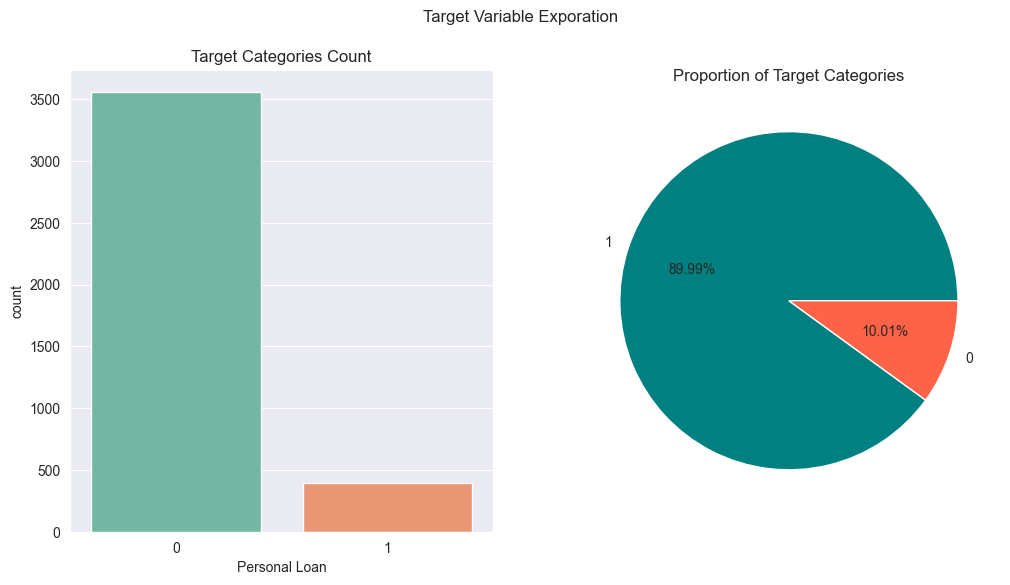

In [122]:
plt.subplots(1, 2, figsize = (12,6))
plt.subplot(121)
sns.countplot(data = train, x = 'Personal Loan', palette= 'Set2')
plt.title('Target Categories Count')

plt.subplot(122)
plt.pie(train['Personal Loan'].value_counts(normalize=True).values,
        labels=[1,0],
        colors=['teal', 'tomato'],
        autopct='%0.2f%%')
plt.title("Proportion of Target Categories")


plt.suptitle('Target Variable Exporation')

plt.savefig("../graphs/target-distribution.png")
plt.show()



- Only 9% accepted the personal loan that was offered to them in the earlier campaign

In [57]:
## dealing with in correct values of `Experince` column
neg_exp = train.loc[train['Experience']<0].shape[0]
print(f'Number of observations with negative experience: {neg_exp}')

Number of observations with negative experience: 41


In [71]:
## dropping all the rows with negative experience
drop_idx = train.loc[train['Experience']<0].index
train = train.drop(index=drop_idx)

neg_exp = train.loc[train['Experience']<0].shape[0]
print(f'Number of observations with negative experience: {neg_exp}')

Number of observations with negative experience: 0


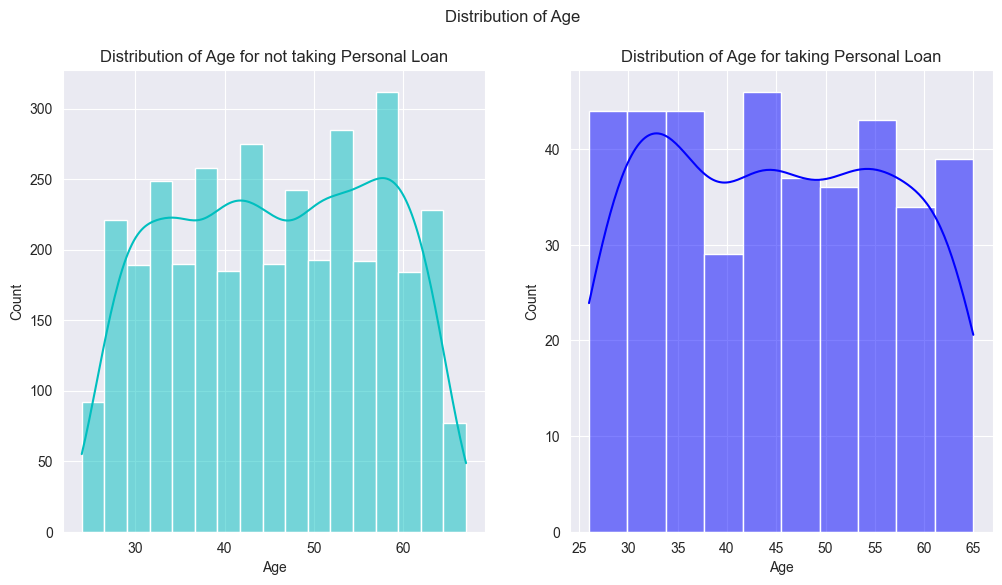

In [123]:
## Distribution of Age
plt.subplots(1, 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(train.loc[train['Personal Loan'] == 0]['Age'], color='c', kde=True)
plt.title("Distribution of Age for not taking Personal Loan")

plt.subplot(122)
sns.histplot(train.loc[train['Personal Loan'] == 1]['Age'], color='b', kde=True)
plt.title("Distribution of Age for taking Personal Loan")

plt.suptitle('Distribution of Age')
plt.savefig("../graphs/age-distribution.png")
plt.show()



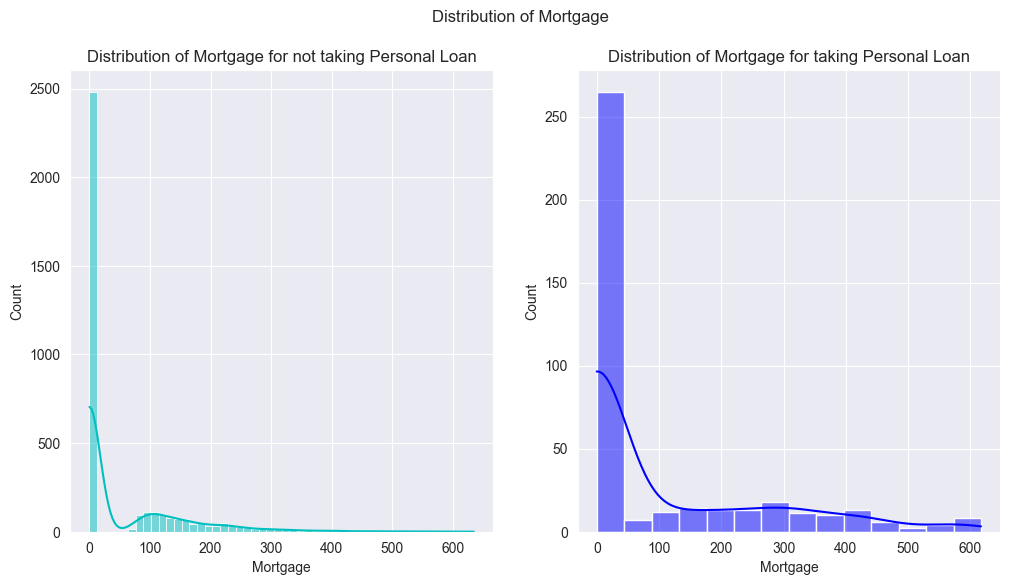

In [126]:
## Distribution of Mortgage
plt.subplots(1, 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(train.loc[train['Personal Loan'] == 0]['Mortgage'], color='c', kde=True)
plt.title("Distribution of Mortgage for not taking Personal Loan")

plt.subplot(122)
sns.histplot(train.loc[train['Personal Loan'] == 1]['Mortgage'], color='b', kde=True)
plt.title("Distribution of Mortgage for taking Personal Loan")

plt.suptitle('Distribution of Mortgage')
plt.savefig("../graphs/mortgage-distribution.png")
plt.show()

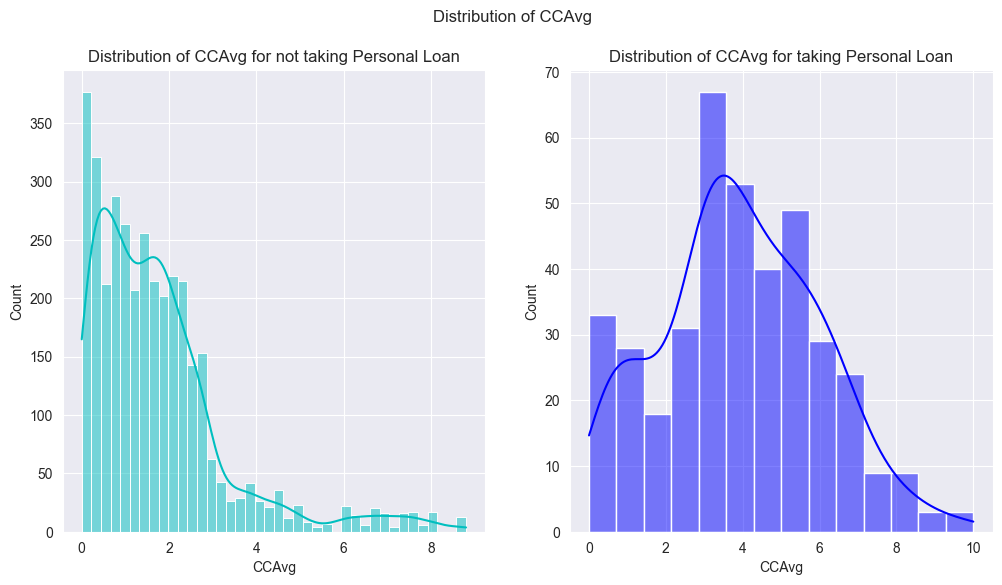

In [124]:
## Distribution of CCAvg
plt.subplots(1, 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(train.loc[train['Personal Loan'] == 0]['CCAvg'], color='c', kde=True)
plt.title("Distribution of CCAvg for not taking Personal Loan")

plt.subplot(122)
sns.histplot(train.loc[train['Personal Loan'] == 1]['CCAvg'], color='b', kde=True)
plt.title("Distribution of CCAvg for taking Personal Loan")

plt.suptitle('Distribution of CCAvg')
plt.savefig("../graphs/CCAvg-distribution.png")
plt.show()

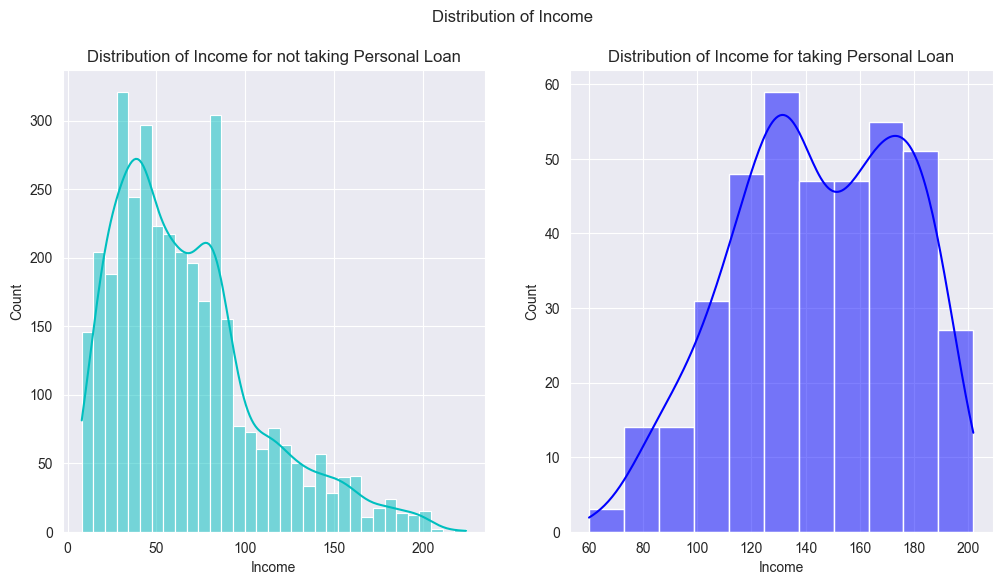

In [125]:
## Distribution of Income
plt.subplots(1, 2, figsize = (12,6))

plt.subplot(121)
sns.histplot(train.loc[train['Personal Loan'] == 0]['Income'], color='c', kde=True)
plt.title("Distribution of Income for not taking Personal Loan")

plt.subplot(122)
sns.histplot(train.loc[train['Personal Loan'] == 1]['Income'], color='b', kde=True)
plt.title("Distribution of Income for taking Personal Loan")

plt.suptitle('Distribution of Income')
plt.savefig("../graphs/Income-distribution.png")
plt.show()

In [98]:
train = train.drop(['ID', 'index'], axis=1)

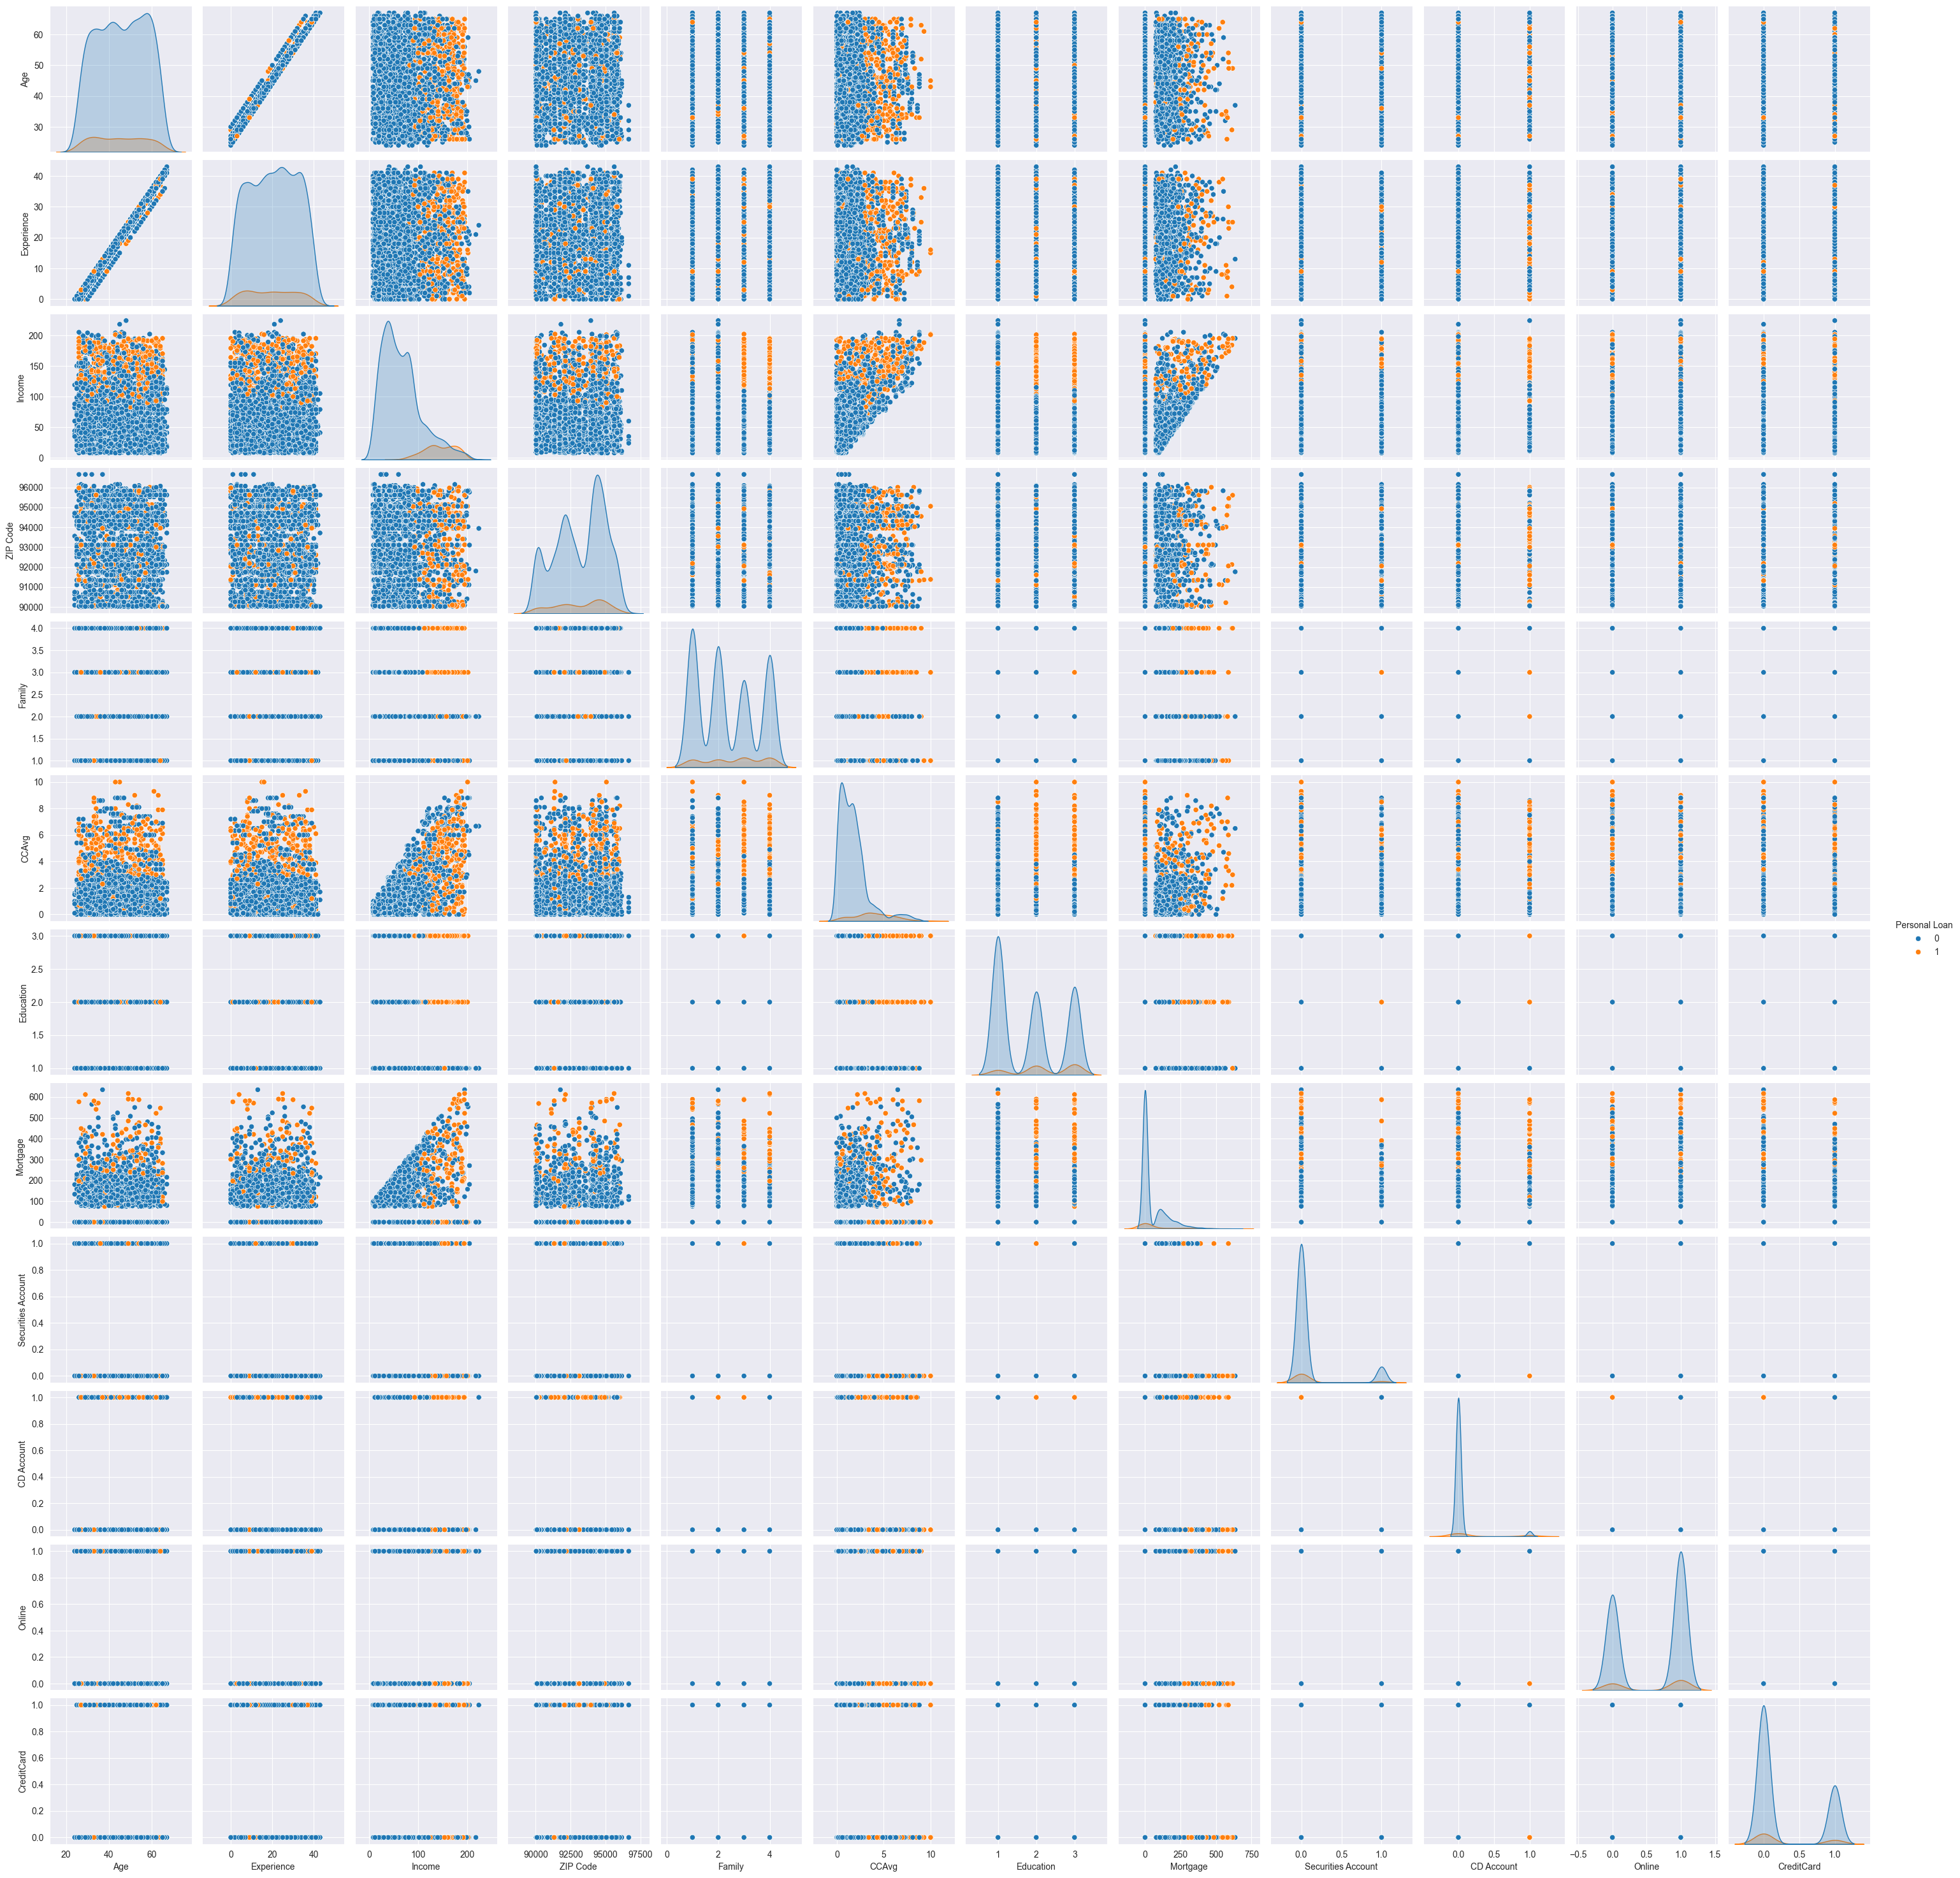

In [127]:
sns.pairplot(train, hue= 'Personal Loan')
plt.savefig("../graphs/pair-plot.png")
plt.show()

### Observations-3:
- `Age` and `Experience` have strong positive correlation
- `ZIP Code` has one outlier value
- People taking `Personal Loan` that was offered to them in earlier campaign have a significantly different `Income` distribution than the people who aren't taking personal loan.
- `CCAvg` i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
- `Family` size is aloso an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is `Mortgage`, `CD Account`, `Education` to some extent among other variables.

In [105]:
# handling an outlier
train.loc[train['ZIP Code']<10000]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
216   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
216              0                   0           0       1           1

In [107]:
## dropping an outlier
train = train.drop(index=216)

In [108]:
train.loc[train['ZIP Code']<10000]

Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

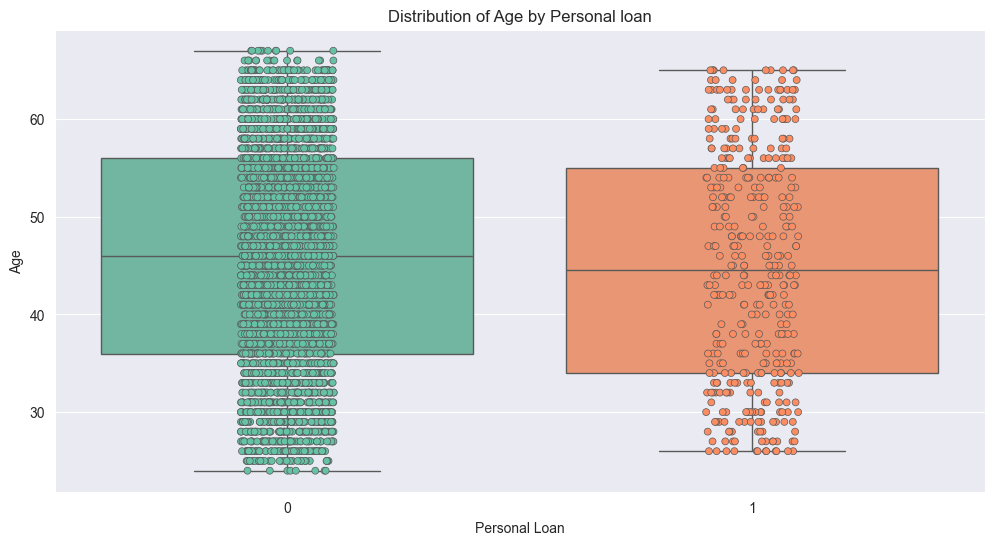

In [130]:
## distribution of Age by personal loan
plt.figure(figsize = (12,6))
sns.boxplot(data = train, x = 'Personal Loan', y = 'Age', palette='Set2')
sns.stripplot(data = train, x = 'Personal Loan', y = 'Age', palette='Set2', jitter=True, linewidth=0.5)
plt.title('Distribution of Age by Personal loan')
plt.savefig("../graphs/Age-wrt-personalLoan.png")
plt.show()

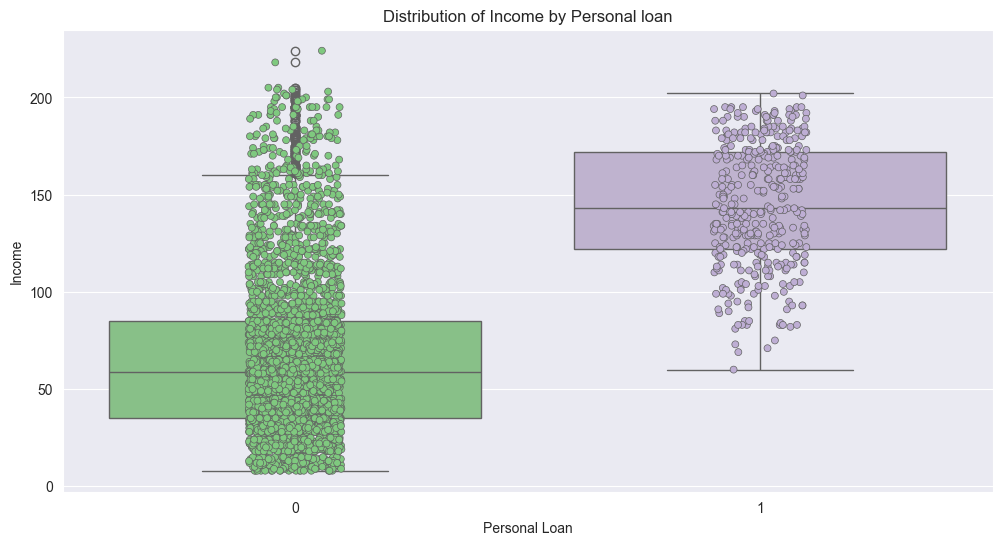

In [128]:
## distribution of income by personal loan
plt.figure(figsize = (12,6))
sns.boxplot(data = train, x = 'Personal Loan', y = 'Income', palette='Accent')
sns.stripplot(data = train, x = 'Personal Loan', y = 'Income', palette='Accent', jitter=True, linewidth=0.5)
plt.title('Distribution of Income by Personal loan')
plt.savefig("../graphs/income-wrt-personalLoan.png")
plt.show()

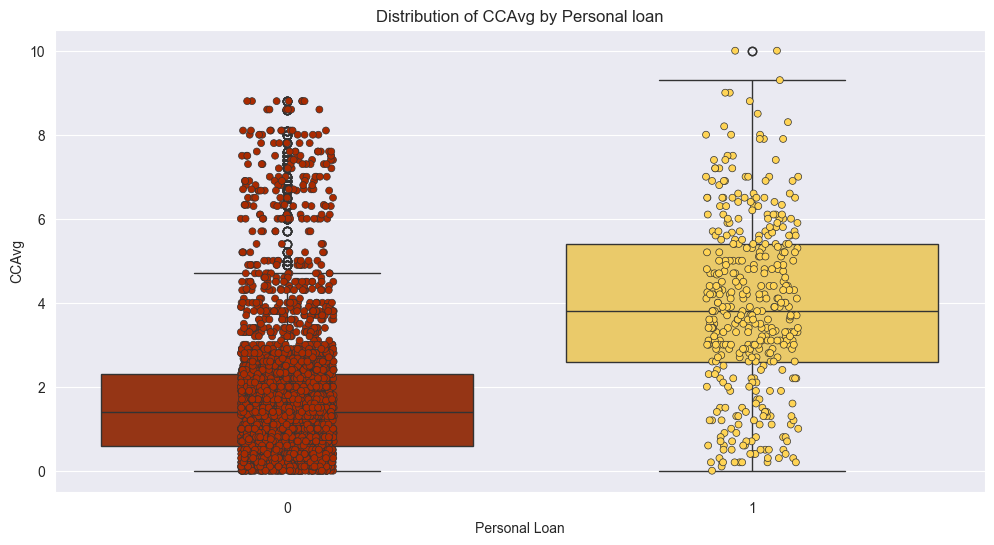

In [121]:
## distribution of CCAvg by personal loan
plt.figure(figsize = (12,6))
sns.boxplot(data = train, x = 'Personal Loan', y = 'CCAvg', palette='afmhot')
sns.stripplot(data = train, x = 'Personal Loan', y = 'CCAvg', palette='afmhot', jitter=True, linewidth=0.5)
plt.title('Distribution of CCAvg by Personal loan')
plt.savefig("../graphs/CCAvg-wrt-personalLoan.png")
plt.show()

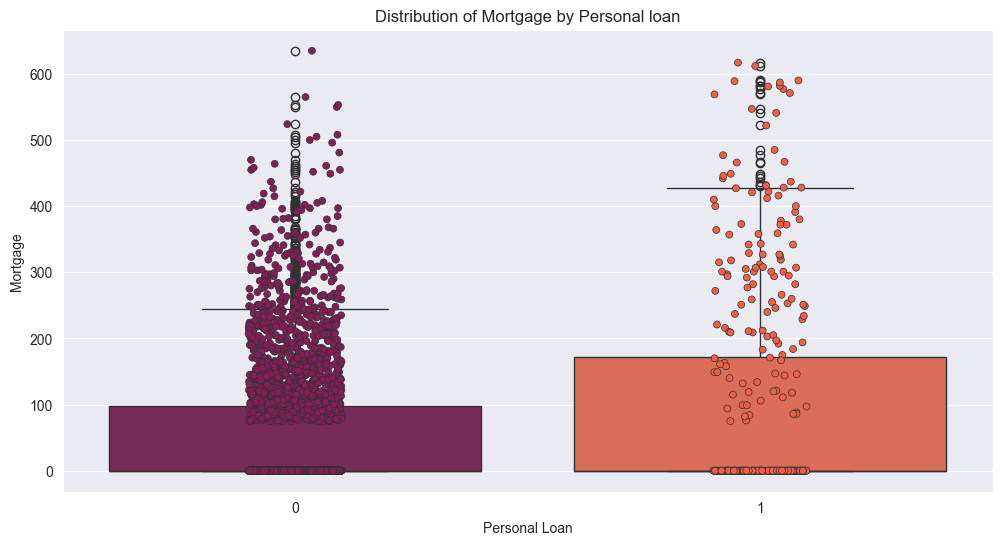

In [133]:
## distribution of Mortgage by personal loan
plt.figure(figsize = (12,6))
sns.boxplot(data = train, x = 'Personal Loan', y = 'Mortgage', palette='rocket')
sns.stripplot(data = train, x = 'Personal Loan', y = 'Mortgage', palette='rocket', jitter=True, linewidth=0.5)
plt.title('Distribution of Mortgage by Personal loan')
plt.savefig("../graphs/Mortgage-wrt-personalLoan.png")
plt.show()

In [136]:
cat_cols = ['Family','Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

<Figure size 1200x600 with 0 Axes>

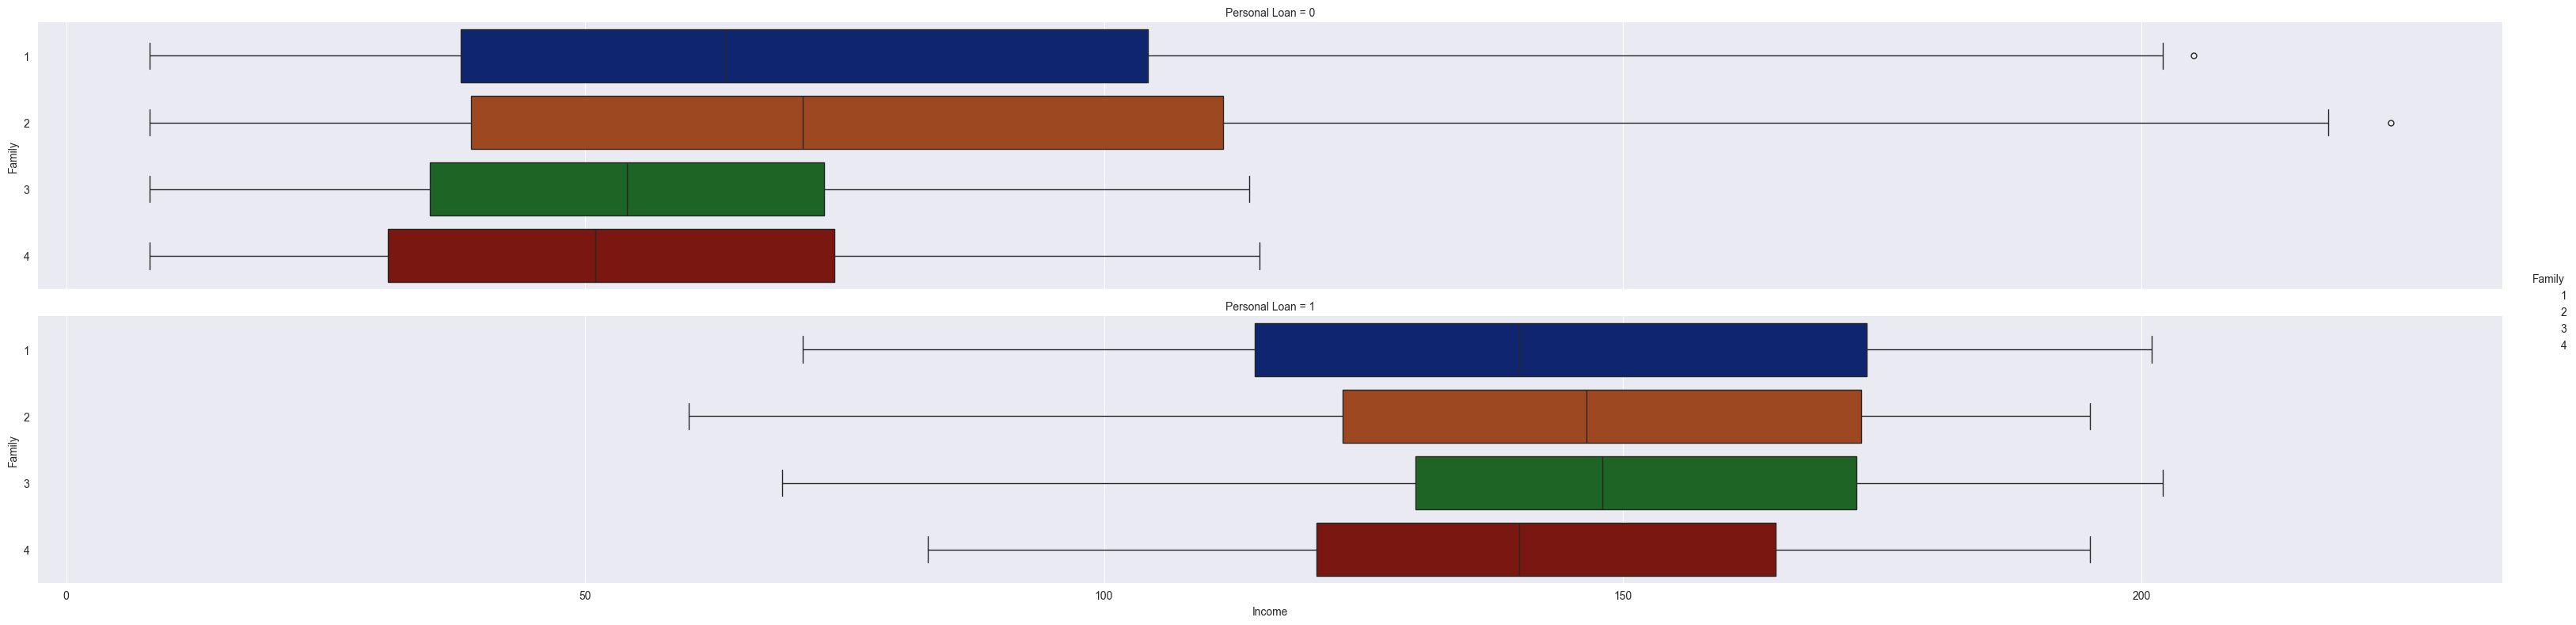

In [149]:
plt.figure(figsize = (12,6))
sns.catplot(data = train, x= 'Income', y = 'Family', row = 'Personal Loan', kind = 'box',
            orient='h', height= 4, aspect=8, palette='dark')
plt.savefig("../graphs/income-family-loan.png")
plt.show()

<Figure size 1200x600 with 0 Axes>

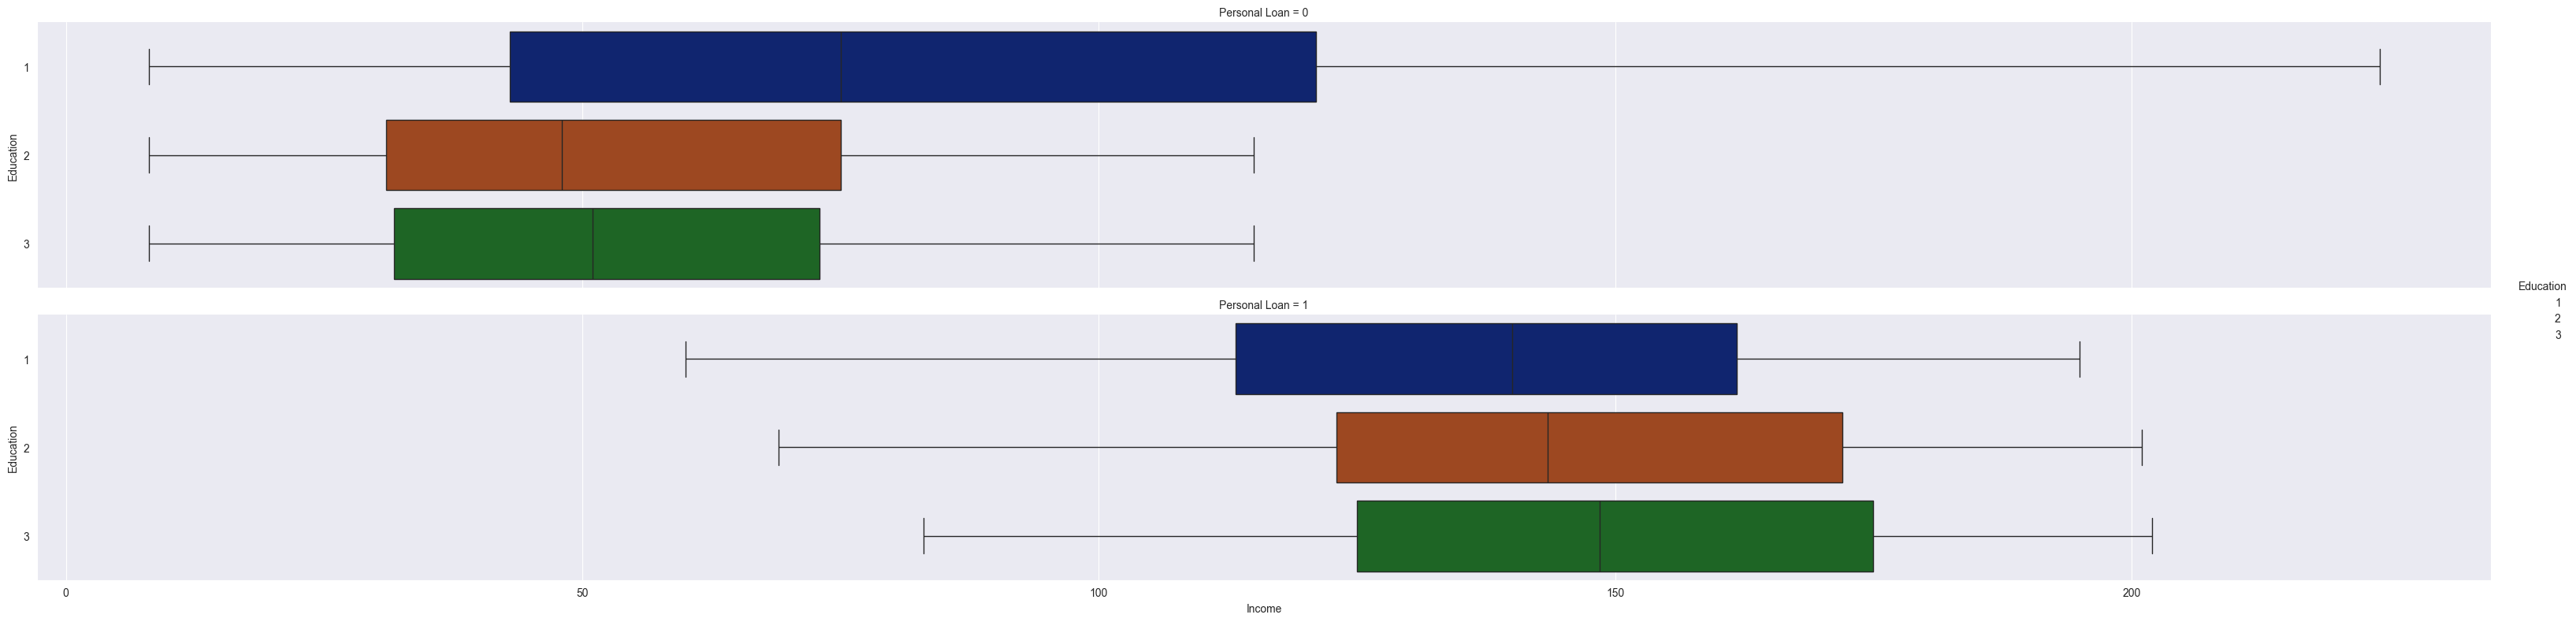

In [148]:
plt.figure(figsize = (12,6))
sns.catplot(data = train, x= 'Income', y = 'Education', row = 'Personal Loan', kind = 'box',
            orient='h', height= 4, aspect=8, palette='dark')
plt.savefig("../graphs/income-education-loan.png")
plt.show()

### Observations-4:
- Higher `Income` people in the dataset have taken loan from the bank in their last campaign.
- Higher the `Income` more are the chances of people taking loan from the bank, irrespective of their family size
- People who have taken `Personal Loan` have the same `Income` level.
- Average spending on credit cards (`CCAvg`) by people taking personal loanis higher than those who aren't taking personal loan.

In [218]:
def cat_plt(col):
    ct = pd.crosstab(index=train[col], columns=train['Personal Loan'], margins= True)
    ft = ct/ct.loc['All', 'All']

    fig = plt.figure(figsize = (12, 6))

    ax = fig.add_subplot(121)
    ft.iloc[:-1, :-1].plot(kind = 'barh', stacked = True, cmap= 'autumn', ax=ax)
    plt.xlabel('Relative Frequency')
    plt.title(f"Proportions of {col} categories")

    ax= fig.add_subplot(122)
    sns.countplot(data = train, x = col, hue = 'Personal Loan', palette= 'autumn', ax=ax)
    plt.title(f"Personal Loan count by {col} categories")
    
    plt.savefig(f'../graphs/{col}-personalLoan-plot.png')
    

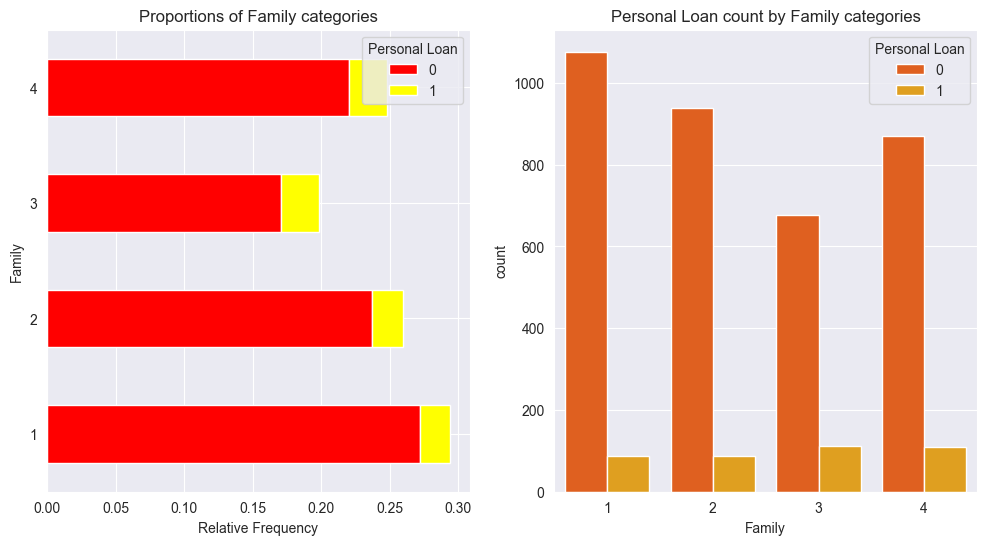

In [219]:
cat_plt('Family')

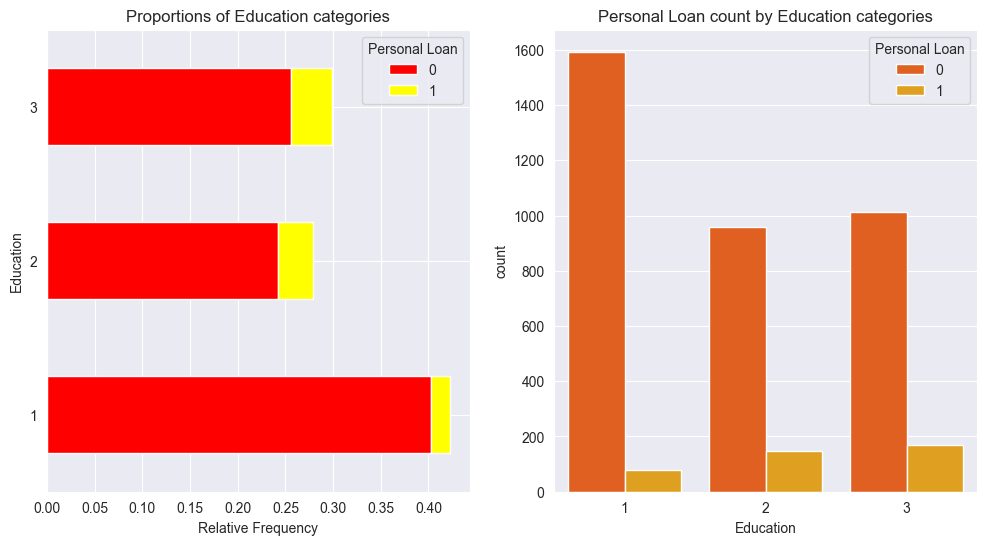

In [220]:
cat_plt('Education')

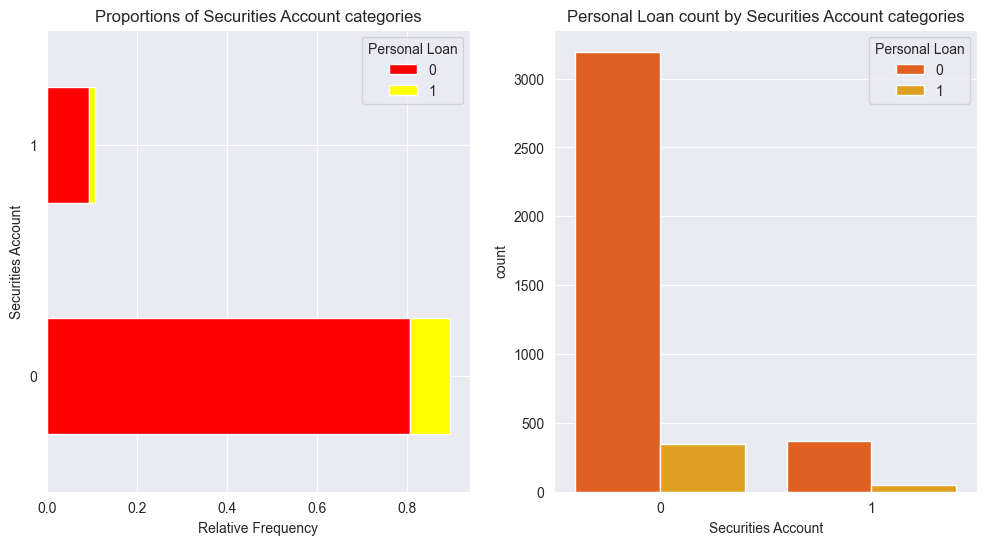

In [221]:
cat_plt('Securities Account')

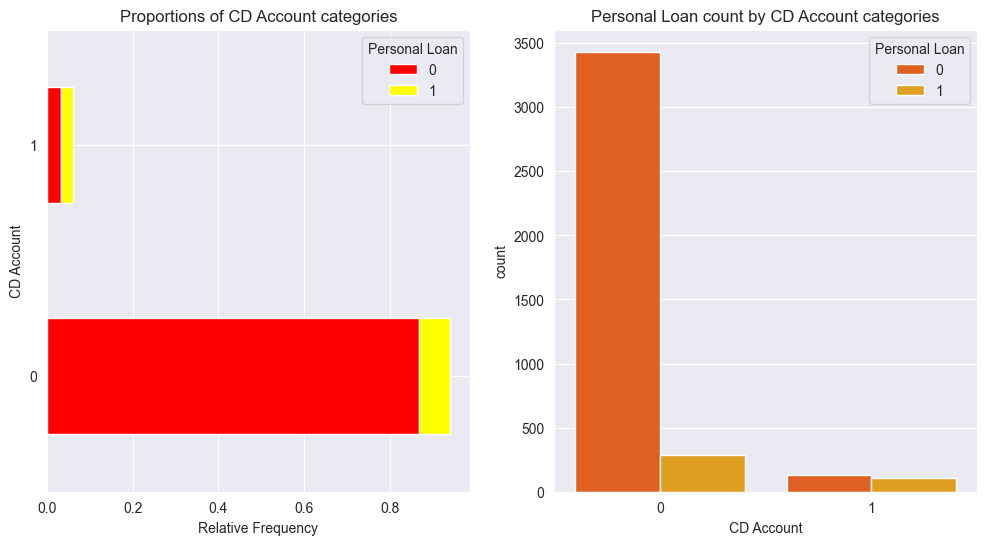

In [222]:
cat_plt('CD Account')

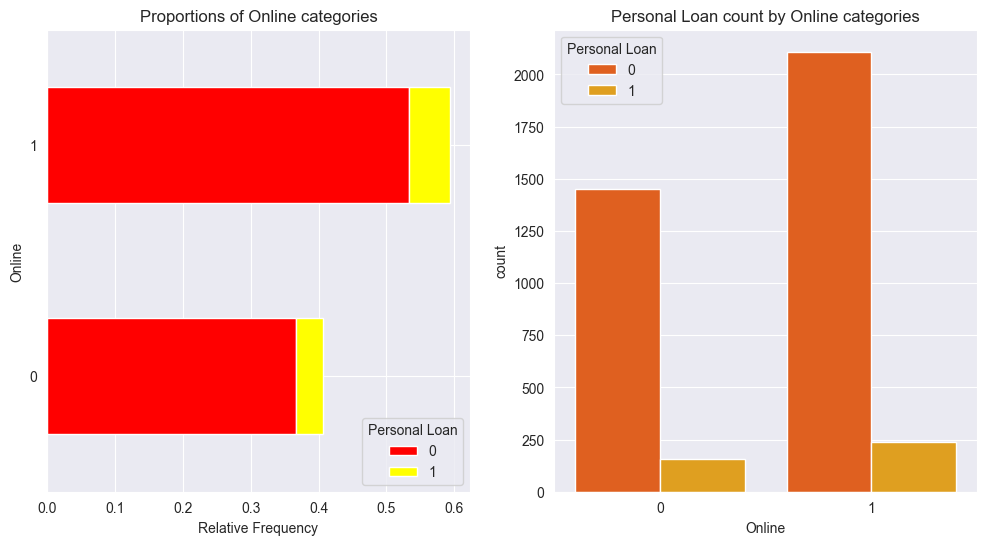

In [223]:
cat_plt('Online')

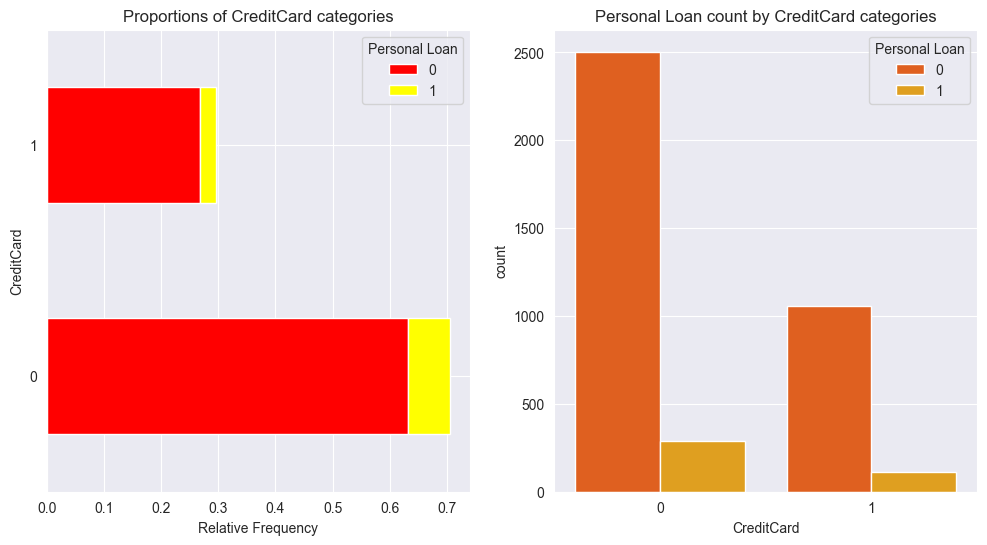

In [224]:
cat_plt('CreditCard')

### Observations-5:
- `Family` size-3 has lowest count relative to other family sizes however has the maximum loan count. 
- Customers whose  `Education` level is 1 are higher in count with minimum personal loan count.
- Number of people taking `personal loan` increases with the increase in `education` level.
- Most of the people who don't have `CD Account` don't take `personal loan`.

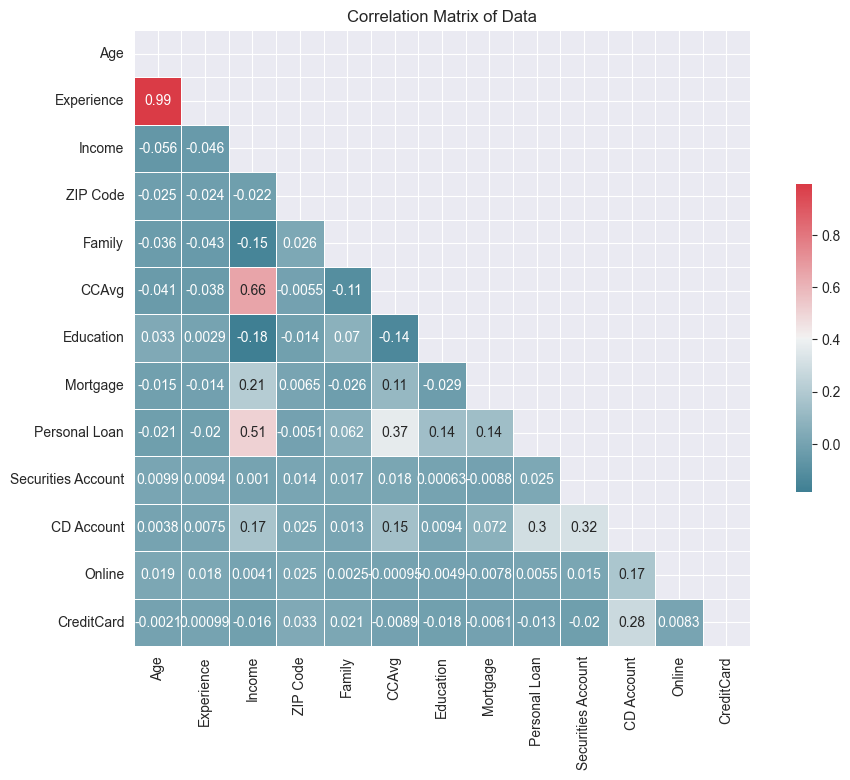

In [230]:
## correlation 

corr = train.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] =True
cmap = sns.diverging_palette(220,10, as_cmap= True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask = mask, cmap = cmap, square= True, linewidth = 0.5, annot=True, cbar_kws={'shrink':0.5})
plt.title('Correlation Matrix of Data')
plt.savefig("../graphs/correlation-plot.png")
plt.show()



In [235]:
## filtering highly correlated features
sorted_corr = corr.abs().unstack().sort_values(ascending=False)
sorted_corr[(sorted_corr>0.5)&(sorted_corr<1)]

Age            Experience       0.994022
Experience     Age              0.994022
CCAvg          Income           0.655422
Income         CCAvg            0.655422
Personal Loan  Income           0.507747
Income         Personal Loan    0.507747
dtype: float64

In [241]:
pd.DataFrame(train.corr()['Personal Loan'].sort_values(ascending=False)).reset_index().rename(columns={'index': 'Variable', 'Personal Loan': 'Correlation'})

Variable  Correlation
0        Personal Loan     1.000000
1               Income     0.507747
2                CCAvg     0.370776
3           CD Account     0.301717
4            Education     0.141263
5             Mortgage     0.136008
6               Family     0.062444
7   Securities Account     0.025147
8               Online     0.005453
9             ZIP Code    -0.005083
10          CreditCard    -0.012663
11          Experience    -0.020093
12                 Age    -0.020959

### Observations-6:
- `Age and Experience` are highly correlated with each other.
- `CCAvg and Income` are moderately correlated with each other.

In [247]:
train = train.reset_index().drop(columns=['index','ZIP Code'])
train.to_csv('../data/cleaned-train.csv', header=True, index=False)

In [248]:
train.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## logging artifact to remote server

In [261]:
path = '../graphs/'
files = os.listdir(path)

with mlflow.start_run(experiment_id= get_experiment_id('loan-modeling'), run_name='logging-graphs') as run:
    
    for file in files:
        file_path = os.path.join(path, file)
        mlflow.log_artifact(file_path, file[:-4])